# Lab 4-2: Load Data

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Slicing 1D Array

In [1]:
nums = [0, 1, 2, 3, 4]

In [2]:
print(nums)

[0, 1, 2, 3, 4]


index 2에서 4 전까지 가져와라. (앞 포함, 뒤 비포함)

In [3]:
print(nums[2:4])

[2, 3]


index 2부터 다 가져와라.

In [4]:
print(nums[2:])

[2, 3, 4]


index 2 전까지 가져와라. (역시 뒤는 비포함)

In [5]:
print(nums[:2])

[0, 1]


전부 가져와라

In [6]:
print(nums[:])

[0, 1, 2, 3, 4]


마지막 index 전까지 가져와라. (뒤는 비포함!)

In [7]:
print(nums[:-1])

[0, 1, 2, 3]


assign 도 가능!

In [8]:
nums[2:4] = [8, 9]

In [9]:
print(nums)

[0, 1, 8, 9, 4]


## Slicing 2D Array

In [10]:
import numpy as np

In [11]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [12]:
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [13]:
b[:, 1]

array([ 2,  6, 10])

In [16]:
b[-1]

array([ 9, 10, 11, 12])

In [15]:
b[-1, :]

array([ 9, 10, 11, 12])

In [17]:
b[-1, ...]

array([ 9, 10, 11, 12])

In [18]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Loading Data from `.csv` file

In [18]:
import numpy as np

In [19]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [20]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [21]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data 길이
print(x_data[:5])   # 첫 다섯 개

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [22]:
print(y_data.shape) # y_data shape
print(len(y_data))  # y_data 길이
print(y_data[:5])   # 첫 다섯 개

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


## Imports

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [24]:
# For reproducibility
torch.manual_seed(1)

## Low-level Implementation

In [25]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 26811.960938
Epoch    1/20 Cost: 9920.530273
Epoch    2/20 Cost: 3675.298340
Epoch    3/20 Cost: 1366.260498
Epoch    4/20 Cost: 512.542480
Epoch    5/20 Cost: 196.896637
Epoch    6/20 Cost: 80.190987
Epoch    7/20 Cost: 37.038696
Epoch    8/20 Cost: 21.081343
Epoch    9/20 Cost: 15.178760
Epoch   10/20 Cost: 12.993679
Epoch   11/20 Cost: 12.183023
Epoch   12/20 Cost: 11.880535
Epoch   13/20 Cost: 11.765958
Epoch   14/20 Cost: 11.720851
Epoch   15/20 Cost: 11.701438
Epoch   16/20 Cost: 11.691514
Epoch   17/20 Cost: 11.685116
Epoch   18/20 Cost: 11.680005
Epoch   19/20 Cost: 11.675380
Epoch   20/20 Cost: 11.670952


## High-level Implementation with `nn.Module`

In [26]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [27]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 28693.490234
Epoch    1/20 Cost: 10618.750000
Epoch    2/20 Cost: 3936.015381
Epoch    3/20 Cost: 1465.219727
Epoch    4/20 Cost: 551.693726
Epoch    5/20 Cost: 213.934616
Epoch    6/20 Cost: 89.052269
Epoch    7/20 Cost: 42.876007
Epoch    8/20 Cost: 25.799639
Epoch    9/20 Cost: 19.482420
Epoch   10/20 Cost: 17.143093
Epoch   11/20 Cost: 16.274508
Epoch   12/20 Cost: 15.949721
Epoch   13/20 Cost: 15.825986
Epoch   14/20 Cost: 15.776565
Epoch   15/20 Cost: 15.754660
Epoch   16/20 Cost: 15.742919
Epoch   17/20 Cost: 15.734917
Epoch   18/20 Cost: 15.728307
Epoch   19/20 Cost: 15.722219
Epoch   20/20 Cost: 15.716357


## Dataset and DataLoader

<div class="alert alert-warning">
    pandas 기초지식이 필요할 것 같다
</div>

너무 데이터가 크면 `x_data`, `y_data` 를 전부 다 가져오지 말고, 필요한 배치만 가져올 수 밖에 없다.

[PyTorch Data Loading and Processing tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset)

In [6]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')
n=65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n,1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1,2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


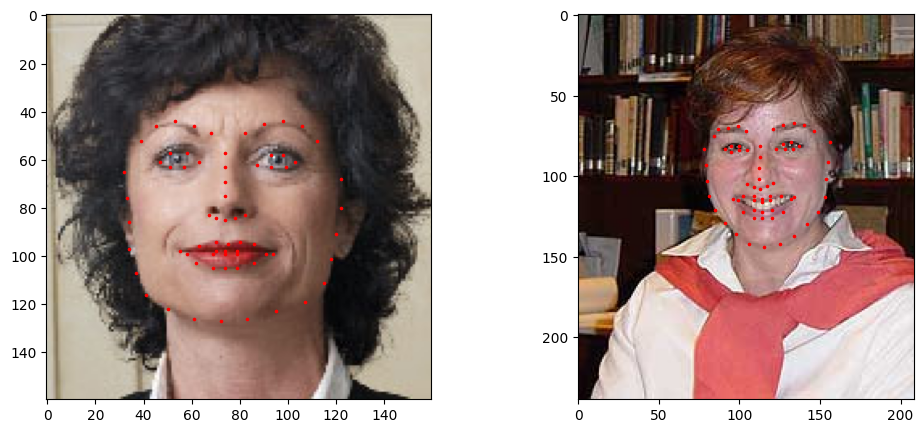

In [14]:
def show_landmarks(image, landmarks, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(image)
    ax.scatter(landmarks[:, 0], landmarks[:,1], s=10, marker='.', c='r')
    #plt.pause(0.001)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
n=65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n,1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1,2)
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.subplot(1,2,2)
n=66
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n,1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1,2)
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.show()

In [7]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.tranform = transform

    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[index, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[index, 1:]
        landmarks = np.array(landmarks, dtype=float).reshape(-1,2)
        sample = {'image': image, 'landmarks':landmarks}

        if self.tranform:
            sample = self.tranform(sample)

        return sample

In [8]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

0 torch.Size([3, 224, 224]) torch.Size([68, 2])


NameError: name 'show_landmarks' is not defined

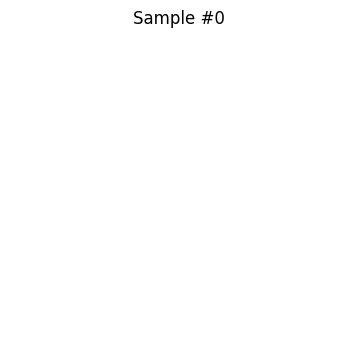

In [9]:
face_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv', root_dir='data/faces',
                                    transform=transforms.Compose([
                                        Rescale(256),
                                        RandomCrop(224),
                                        ToTensor()
                                    ]))
fig = plt.figure(figsize=(20, 4))

for i, sample in enumerate(face_dataset):
    print(i, sample['image'].shape, sample['landmarks'].shape)
    ax = plt.subplot(1, 4, i+1)
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample, ax=ax)

    if i==3:
        plt.tight_layout()
        plt.show()
        break



In [23]:
import cProfile
import pstats
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import multivariate_normal

# 예제 데이터 생성
np.random.seed(42)
mean = [2, 3]
cov = [[1, 0.5], [0.5, 2]]  # 공분산 행렬

# 100개의 2차원 데이터 포인트 생성
data = np.random.multivariate_normal(mean, cov, 10000)

# 테스트 포인트
test_point = np.array([1, 1])

print("데이터 평균:", np.mean(data, axis=0))
print("데이터 공분산 행렬:")
data_cov = np.cov(data.T)
print(data_cov)
print("테스트 포인트:", test_point)



# 방법 1: 코드 블록 프로파일링
def mahal_dist_scipy():
    # 방법 1: scipy 사용
    data_mean = np.mean(data, axis=0)
    data_cov_inv = np.linalg.inv(data_cov)
    mahal_dist_scipy = mahalanobis(test_point, data_mean, data_cov_inv)
    return mahal_dist_scipy

# 프로파일링 실행
cProfile.run('mahal_dist_scipy()', 'profile_output.prof')

# 결과 분석
stats = pstats.Stats('profile_output.prof')
stats.sort_stats('tottime').print_stats(10)  # 상위 10개 함수

데이터 평균: [2.0084634  3.00227376]
데이터 공분산 행렬:
[[0.99511583 0.51831628]
 [0.51831628 2.04396096]]
테스트 포인트: [1 1]
Mon Aug 11 13:37:28 2025    profile_output.prof

         49 function calls in 0.001 seconds

   Ordered by: internal time
   List reduced from 38 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 /home/cho/workspace/PyTorch/.venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:557(inv)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 /home/cho/workspace/PyTorch/.venv/lib/python3.13/site-packages/scipy/spatial/distance.py:1092(mahalanobis)
        1    0.000    0.000    0.000    0.000 /home/cho/workspace/PyTorch/.venv/lib


setosa 품종:
평균 거리: 1.824
표준편차: 0.771
최대 거리: 3.511

versicolor 품종:
평균 거리: 1.869
표준편차: 0.654
최대 거리: 3.534

virginica 품종:
평균 거리: 1.867
표준편차: 0.660
최대 거리: 3.697
Mon Aug 11 13:51:23 2025    profile_output.prof

         21949 function calls (21284 primitive calls) in 0.015 seconds

   Ordered by: internal time
   List reduced from 329 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      150    0.001    0.000    0.007    0.000 /home/cho/workspace/PyTorch/.venv/lib/python3.13/site-packages/pandas/core/series.py:389(__init__)
      150    0.001    0.000    0.002    0.000 /home/cho/workspace/PyTorch/.venv/lib/python3.13/site-packages/scipy/spatial/distance.py:1092(mahalanobis)
     4952    0.001    0.000    0.001    0.000 {built-in method builtins.isinstance}
      153    0.001    0.000    0.002    0.000 /home/cho/workspace/PyTorch/.venv/lib/python3.13/site-packages/pandas/core/construction.py:517(sanitize_array)
2304/1651    0.000    0.00

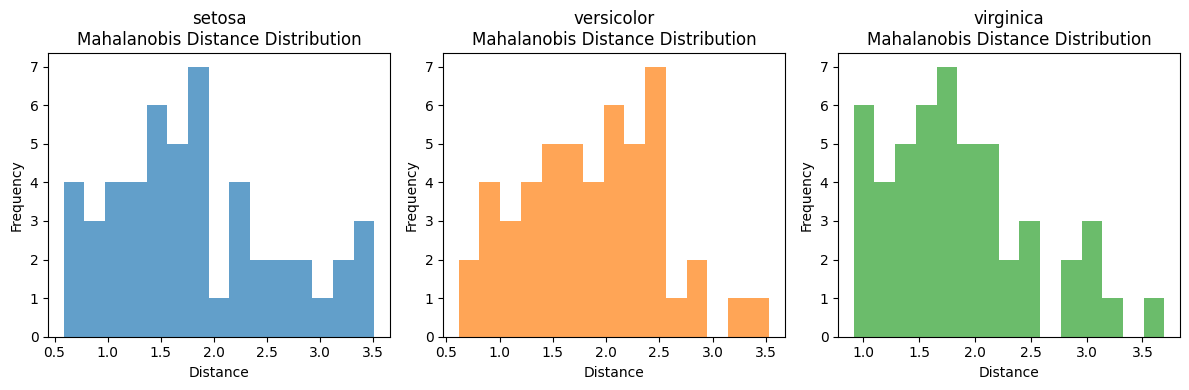

In [25]:
import pandas as pd
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

def mahalanobis_distance_df(df):
    """
    DataFrame에 대한 Mahalanobis 거리 계산
    """
    center = df.mean().values
    cov_matrix = df.cov().values
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    distances = []
    for _, row in df.iterrows():
        distance = mahalanobis(row.values, center, inv_cov_matrix)
        distances.append(distance)
    
    return np.array(distances)

def test_fn():
    # 각 품종별로 Mahalanobis 거리 계산
    species_names = iris.target_names
    results = {}

    for i, species in enumerate(species_names):
        species_data = df[iris.target == i]
        distances = mahalanobis_distance_df(species_data)
        results[species] = distances
        
        print(f"\n{species} 품종:")
        print(f"평균 거리: {np.mean(distances):.3f}")
        print(f"표준편차: {np.std(distances):.3f}")
        print(f"최대 거리: {np.max(distances):.3f}")

# 프로파일링 실행
cProfile.run('test_fn()', 'profile_output.prof')

# 결과 분석
stats = pstats.Stats('profile_output.prof')
stats.sort_stats('tottime').print_stats(10)  # 상위 10개 함수

# 시각화
plt.figure(figsize=(12, 4))
for i, (species, distances) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.hist(distances, bins=15, alpha=0.7, color=f'C{i}')
    plt.title(f'{species}\nMahalanobis Distance Distribution')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
import cProfile
import time

# 원본 (느린) 버전
def mahalanobis_distance_df_slow(df):
    """pandas 기반 - 느림"""
    center = df.mean().values
    cov_matrix = df.cov().values
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    distances = []
    for _, row in df.iterrows():  # iterrows는 매우 느림
        distance = mahalanobis(row.values, center, inv_cov_matrix)
        distances.append(distance)
    
    return np.array(distances)

# 최적화된 버전 1: NumPy 벡터화
def mahalanobis_distance_vectorized(data):
    """NumPy 벡터화 - 빠름"""
    center = np.mean(data, axis=0)
    cov_matrix = np.cov(data.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # 벡터화된 계산
    diff = data - center
    distances = np.sqrt(np.sum((diff @ inv_cov_matrix) * diff, axis=1))
    
    return distances

# 최적화된 버전 2: 사전 계산된 역행렬 재사용
def mahalanobis_distance_precomputed(data, center=None, inv_cov=None):
    """사전 계산된 값 재사용 - 매우 빠름"""
    if center is None:
        center = np.mean(data, axis=0)
    if inv_cov is None:
        cov_matrix = np.cov(data.T)
        inv_cov = np.linalg.inv(cov_matrix)
    
    diff = data - center
    distances = np.sqrt(np.sum((diff @ inv_cov) * diff, axis=1))
    
    return distances

# 성능 비교 함수
def performance_comparison():
    # 테스트 데이터 생성
    np.random.seed(42)
    data = np.random.multivariate_normal([0, 0, 0, 0], 
                                       np.eye(4) + 0.1, 150)
    df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4'])
    
    print("=== 성능 비교 (150개 샘플, 4차원) ===\n")
    
    # 1. 원본 pandas 버전
    start = time.perf_counter()
    result1 = mahalanobis_distance_df_slow(df)
    time1 = time.perf_counter() - start
    print(f"1. Pandas iterrows 방식: {time1:.4f}초")
    
    # 2. NumPy 벡터화 버전
    start = time.perf_counter()
    result2 = mahalanobis_distance_vectorized(data)
    time2 = time.perf_counter() - start
    print(f"2. NumPy 벡터화 방식: {time2:.4f}초")
    
    # 3. 사전 계산된 버전
    center = np.mean(data, axis=0)
    inv_cov = np.linalg.inv(np.cov(data.T))
    
    start = time.perf_counter()
    result3 = mahalanobis_distance_precomputed(data, center, inv_cov)
    #result3 = mahalanobis_distance_precomputed(data)
    time3 = time.perf_counter() - start
    print(f"3. 사전 계산 방식: {time3:.4f}초")
    
    # 속도 개선 비율
    print(f"\n=== 속도 개선 ===")
    print(f"벡터화 vs 원본: {time1/time2:.1f}배 빠름")
    print(f"사전계산 vs 원본: {time1/time3:.1f}배 빠름")
    
    # 결과 검증 (거의 동일해야 함)
    print(f"\n=== 결과 검증 ===")
    print(f"결과1 vs 결과2 차이: {np.max(np.abs(result1 - result2)):.10f}")
    print(f"결과1 vs 결과3 차이: {np.max(np.abs(result1 - result3)):.10f}")
    
    return result1, result2, result3

# 메모리 효율적인 배치 처리
def mahalanobis_batch_processing(data, batch_size=1000):
    """대용량 데이터를 위한 배치 처리"""
    n_samples = len(data)
    center = np.mean(data, axis=0)
    inv_cov = np.linalg.inv(np.cov(data.T))
    
    distances = np.zeros(n_samples)
    
    for i in range(0, n_samples, batch_size):
        end_idx = min(i + batch_size, n_samples)
        batch = data[i:end_idx]
        
        diff = batch - center
        batch_distances = np.sqrt(np.sum((diff @ inv_cov) * diff, axis=1))
        distances[i:end_idx] = batch_distances
    
    return distances

# 프로파일링 비교
def profile_comparison():
    """프로파일링으로 성능 비교"""
    np.random.seed(42)
    data = np.random.multivariate_normal([0, 0, 0, 0], 
                                       np.eye(4) + 0.1, 150)
    df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4'])
    
    print("=== 프로파일링 비교 ===\n")
    
    print("1. 원본 pandas 방식:")
    cProfile.run('mahalanobis_distance_df_slow(df)', sort='tottime')
    
    print("\n2. 최적화된 NumPy 방식:")
    cProfile.run('mahalanobis_distance_vectorized(data)', sort='tottime')

if __name__ == "__main__":
    # 성능 비교 실행
    performance_comparison()
    
    # 대용량 데이터 테스트
    print("\n=== 대용량 데이터 테스트 (10,000개 샘플) ===")
    large_data = np.random.multivariate_normal([0, 0, 0, 0], 
                                             np.eye(4) + 0.1, 10000)
    
    start = time.perf_counter()
    large_result = mahalanobis_distance_vectorized(large_data)
    large_time = time.perf_counter() - start
    print(f"10,000개 샘플 처리 시간: {large_time:.4f}초")

=== 성능 비교 (150개 샘플, 4차원) ===

1. Pandas iterrows 방식: 0.0040초
2. NumPy 벡터화 방식: 0.0002초
3. 사전 계산 방식: 0.0000초

=== 속도 개선 ===
벡터화 vs 원본: 25.2배 빠름
사전계산 vs 원본: 159.9배 빠름

=== 결과 검증 ===
결과1 vs 결과2 차이: 0.0000000000
결과1 vs 결과3 차이: 0.0000000000

=== 대용량 데이터 테스트 (10,000개 샘플) ===
10,000개 샘플 처리 시간: 0.0012초
